# Stock Price prediction and Forecasting using Stacked LSTM

In [199]:
### Keras and Tensarflow >2.0

In [200]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [201]:
pip install pandas numpy requests

Note: you may need to restart the kernel to use updated packages.


In [206]:
### Data Collection
import pandas_datareader as pdr

In [207]:
key ='941e63ecd8e257bee503ebc04a5492ad5887f29c'

In [208]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\manes\AppData\Local\Temp\ipykernel_16552\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [209]:
df.to_csv('AAPL.csv')

In [210]:
import pandas as pd

In [211]:
df = pd.read_csv('AAPL.csv')

In [212]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
1,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0
2,AAPL,2018-09-17 00:00:00+00:00,217.88,222.95,217.27,222.15,37195133,52.163924,53.377763,52.017881,53.186230,148780532,0.0,1.0
3,AAPL,2018-09-18 00:00:00+00:00,218.24,221.85,217.12,217.79,31571712,52.250114,53.114405,51.981968,52.142377,126286848,0.0,1.0
4,AAPL,2018-09-19 00:00:00+00:00,218.37,219.62,215.30,218.50,27123833,52.281238,52.580508,51.546231,52.312362,108495332,0.0,1.0


In [213]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,AAPL,2023-09-01 00:00:00+00:00,189.46,189.920,188.28,189.485,45766503,189.46,189.920,188.28,189.485,45766503,0.0,1.0
1251,AAPL,2023-09-05 00:00:00+00:00,189.70,189.980,187.61,188.280,45280027,189.70,189.980,187.61,188.280,45280027,0.0,1.0
1252,AAPL,2023-09-06 00:00:00+00:00,182.91,188.850,181.47,188.400,81755816,182.91,188.850,181.47,188.400,81755816,0.0,1.0
1253,AAPL,2023-09-07 00:00:00+00:00,177.56,178.210,173.54,175.180,112488803,177.56,178.210,173.54,175.180,112488803,0.0,1.0
1254,AAPL,2023-09-08 00:00:00+00:00,178.18,180.239,177.79,178.350,65602066,178.18,180.239,177.79,178.350,65602066,0.0,1.0


In [214]:
df1 = df.reset_index()['close']

In [115]:
df1[1228:]

1228    195.605
1229    192.580
1230    191.170
1231    181.990
1232    178.850
1233    179.800
1234    178.190
1235    177.970
1236    177.790
1237    179.460
1238    177.450
1239    176.570
1240    174.000
1241    174.490
1242    175.840
1243    177.230
1244    181.120
1245    176.380
1246    178.610
1247    180.190
1248    184.120
1249    187.650
1250    187.870
1251    189.460
1252    189.700
1253    182.910
1254    177.560
1255    178.180
Name: close, dtype: float64

In [116]:
df1.shape

(1256,)

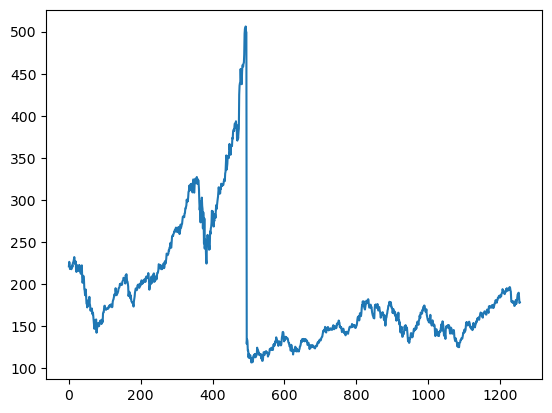

In [117]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [118]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 


In [119]:
import numpy as np

In [120]:
df1

0       221.07
1       226.41
2       223.84
3       217.88
4       218.24
         ...  
1251    189.46
1252    189.70
1253    182.91
1254    177.56
1255    178.18
Name: close, Length: 1256, dtype: float64

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [216]:
df1

array([[0.29948654],
       [0.29304947],
       [0.27812148],
       ...,
       [0.19053225],
       [0.17713212],
       [0.17868503]])

In [217]:
print(df1)

[[0.29948654]
 [0.29304947]
 [0.27812148]
 ...
 [0.19053225]
 [0.17713212]
 [0.17868503]]


In [218]:
df1.shape

(1255, 1)

In [219]:
## splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data = df1[0:training_size, :]
test_data = df1[training_size:, :1]

In [220]:
training_size,test_size

(815, 440)

In [221]:
len(train_data), len(test_data)

(815, 440)

In [222]:
train_data

array([[2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],
       [2.95829681e-01],
       [2.97808391e-01],
       [3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],
       [2.66649969e-01],
       [2.80576080e-01],
       [2.88991860e-01],
       [2.52072636e-01],
       [2.37319975e-01],
       [2.42780213e-01],
       [2.58259236e-01],


In [223]:
test_data

array([[0.17092048],
       [0.16961803],
       [0.181866  ],
       [0.17257358],
       [0.16904195],
       [0.18149029],
       [0.16385723],
       [0.16105197],
       [0.15757044],
       [0.16568566],
       [0.17232311],
       [0.17392611],
       [0.18407013],
       [0.18146525],
       [0.18169067],
       [0.17873513],
       [0.17715717],
       [0.18827802],
       [0.18249217],
       [0.17051972],
       [0.16320601],
       [0.16363181],
       [0.1636819 ],
       [0.17092048],
       [0.17204759],
       [0.1636819 ],
       [0.16588604],
       [0.15769568],
       [0.14875391],
       [0.14444584],
       [0.13918597],
       [0.13720726],
       [0.13259862],
       [0.1323732 ],
       [0.13119599],
       [0.15902317],
       [0.17016907],
       [0.16974327],
       [0.17282405],
       [0.16546024],
       [0.16418284],
       [0.16235441],
       [0.1702943 ],
       [0.17392611],
       [0.16350657],
       [0.15479023],
       [0.15539136],
       [0.165

In [225]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [226]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [227]:
print(X_train)

[[0.29948654 0.29304947 0.27812148 ... 0.16132749 0.16866625 0.16881653]
 [0.29304947 0.27812148 0.27902317 ... 0.16866625 0.16881653 0.16055103]
 [0.27812148 0.27902317 0.27934878 ... 0.16881653 0.16055103 0.15922354]
 ...
 [0.09718222 0.1059737  0.10429555 ... 0.13375078 0.14642455 0.14509706]
 [0.1059737  0.10429555 0.09906074 ... 0.14642455 0.14509706 0.14256731]
 [0.10429555 0.09906074 0.08919224 ... 0.14509706 0.14256731 0.1377583 ]]


In [228]:
print(X_train.shape),print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [229]:
print(X_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [230]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [231]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [232]:
### create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [233]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [234]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
X_train[:100]

array([[[0.29948654],
        [0.29304947],
        [0.27812148],
        ...,
        [0.16132749],
        [0.16866625],
        [0.16881653]],

       [[0.29304947],
        [0.27812148],
        [0.27902317],
        ...,
        [0.16866625],
        [0.16881653],
        [0.16055103]],

       [[0.27812148],
        [0.27902317],
        [0.27934878],
        ...,
        [0.16881653],
        [0.16055103],
        [0.15922354]],

       ...,

       [[0.16132749],
        [0.16866625],
        [0.16881653],
        ...,
        [0.22978084],
        [0.2222417 ],
        [0.23283657]],

       [[0.16866625],
        [0.16881653],
        [0.16055103],
        ...,
        [0.2222417 ],
        [0.23283657],
        [0.23268629]],

       [[0.16881653],
        [0.16055103],
        [0.15922354],
        ...,
        [0.23283657],
        [0.23268629],
        [0.22812774]]])

In [257]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
12/12 [==============================] - 8s 247ms/step - loss: 0.0462 - val_loss: 0.0070
Epoch 2/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0128 - val_loss: 9.3201e-04
Epoch 3/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0104 - val_loss: 5.0596e-04
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0089 - val_loss: 9.9806e-04
Epoch 5/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0077 - val_loss: 3.4273e-04
Epoch 6/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0079 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0063 - val_loss: 8.8003e-04
Epoch 8/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0071 - val_loss: 8.8580e-04
Epoch 9/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0059 - val_loss: 3.3827e-04
Epoch 10/100
12/12 [==============================] - 2s 150ms/

In [258]:
import tensorflow as tf

In [259]:
tf.__version__

'2.13.0'

In [260]:
## Lets Do the prediction and check the performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 27ms/step


In [261]:
## Transform back to original form
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_predict)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [262]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


0.08361409294406444

In [263]:
#Test the Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


0.04309145088079897

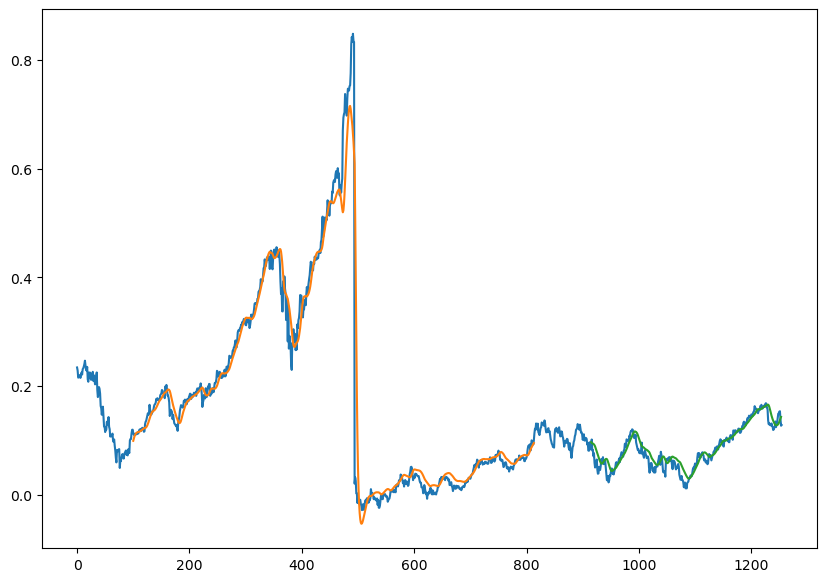

In [264]:
##Plotting
# shift train predictions for plotting
look_back = 100
train_predict_plot = numpy.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

#Shift test predictions for plotting
look_back = 100
test_predict_plot = numpy.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict

# plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [265]:
len( test_data)

440

In [266]:
X_input = test_data[340:].reshape(-1, 1)
X_input.shape


(100, 1)

In [267]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()


In [268]:
temp_input = X_input.tolist()

In [269]:
temp_input

[[0.14935504070131495],
 [0.15226048841577955],
 [0.14980588603631806],
 [0.14572323105823415],
 [0.14649968691296178],
 [0.14259236067626796],
 [0.14256731371321218],
 [0.15421415153412643],
 [0.15739511584220411],
 [0.15716969317470253],
 [0.1545397620538509],
 [0.15180964308077638],
 [0.1476518472135253],
 [0.16713838447088286],
 [0.16696305572949277],
 [0.16262993112085156],
 [0.16710081402629928],
 [0.16758922980588598],
 [0.16463368816530988],
 [0.1633813400125234],
 [0.1633813400125234],
 [0.16493425172197868],
 [0.17084533500313087],
 [0.17112085159674384],
 [0.1687163431433938],
 [0.16210394489668123],
 [0.16280525986224165],
 [0.1656856606136506],
 [0.17179711959924854],
 [0.17648090169067],
 [0.17635566687539134],
 [0.1834690043832185],
 [0.1856230432060112],
 [0.18219160926737632],
 [0.18126487163431432],
 [0.1777833437695679],
 [0.18467125860989347],
 [0.18564809016906697],
 [0.19273638071383836],
 [0.1915341264871634],
 [0.19313713212273004],
 [0.19829680651221032],
 [0.1

In [271]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)


In [272]:
import matplotlib.pyplot as plt

In [273]:
len(df1)

1255

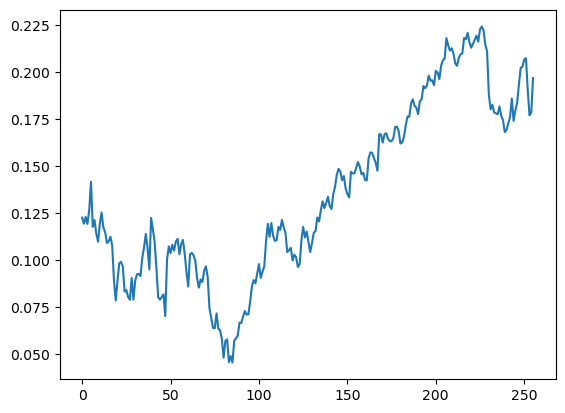

In [274]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

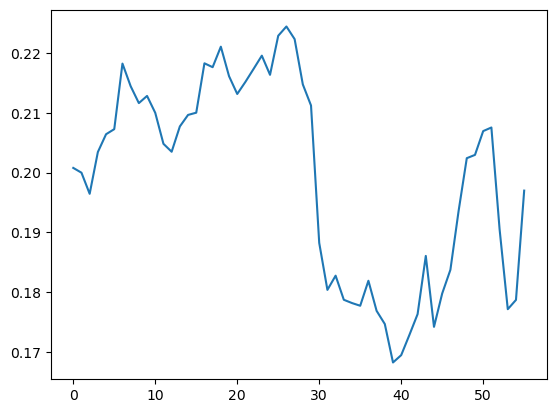

In [275]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [276]:
df3=scaler.inverse_transform(df3).tolist()

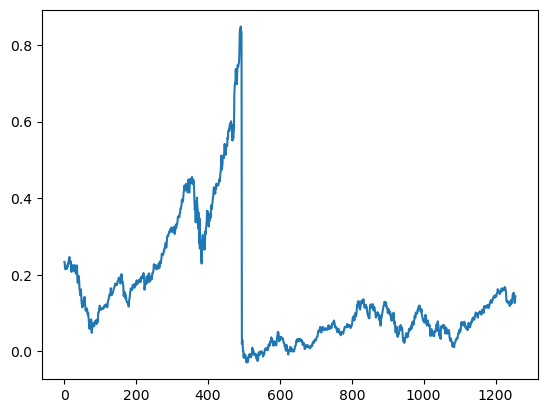

In [277]:
plt.plot(df3)